#Grupo 25 - Entregable EyCD

#Parte 2 de 2

Integrantes:

Rufeil Fiori, Elena

Sosa, Manuel

Taié Mirón, Macarena

Yurovich, Luis Federico

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [ ]:
# Leemos el conjunto de datos que ya tenemos
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
#Conjunto de datos creado en la parte 1 de este entregable
melb_df_processed = pandas.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRfCmFJhvBaqJRDJd9OkQ0ud-SETlbVXZN7EbMSoxYj1yyW_WpN830xD7BFOF26uLxz8TuN98RgJWSZ/pub?output=csv')
melb_df_processed.head()

,Rooms,Bedroom2,Bathroom,Distance,Car,Landsize,BuildingArea,YearBuilt,Price,Type,CouncilArea,Postcode,zipcode,airbnb_price_mean,zipcode_count
0,2,2,1,2.5,1.0,202,NaN,NaN,1480000,h,Yarra,3067,3067.0,130.624031,258.0
1,2,2,1,2.5,0.0,156,79.0,1900.0,1035000,h,Yarra,3067,3067.0,130.624031,258.0
2,3,3,2,2.5,0.0,134,150.0,1900.0,1465000,h,Yarra,3067,3067.0,130.624031,258.0
3,3,3,2,2.5,1.0,94,NaN,NaN,850000,h,Yarra,3067,3067.0,130.624031,258.0
4,4,3,1,2.5,2.0,120,142.0,2014.0,1600000,h,Yarra,3067,3067.0,130.624031,258.0


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila para variables categóricas y las adjuntamos al dataset.


###Dejamos copias del dataset original y armamos un dataset con solo dos columnas


In [ ]:
df_original = melb_df_processed.copy()

In [ ]:
# Reservamos en otro data frame las dos columnas para juntar despues:
melb_df_2 = melb_df_processed[["BuildingArea", "YearBuilt"]]
price_column = melb_df_processed.Price

###Pasamos las variables categóricas a numéricas y agregamos esas columnas al final del dataset

In [ ]:
categorical_cols = ['Type','CouncilArea']
cols =  categorical_cols

# Drop columns
melb_df_processed = melb_df_processed.drop(columns = [
                                                      "zipcode", 
                                                      "Postcode",
                                                      "zipcode_count",
                                                      "Price"
                                                      ])

In [ ]:
melb_df_processed[categorical_cols].nunique()

Type            3
CouncilArea    27
dtype: int64

In [ ]:
# Check for nulls
melb_df_processed.isnull().sum() / melb_df_processed.shape[0]

Rooms                0.000000
Bedroom2             0.000000
Bathroom             0.000000
Distance             0.000000
Car                  0.004772
Landsize             0.000000
BuildingArea         0.478880
YearBuilt            0.397450
Type                 0.000000
CouncilArea          0.095979
airbnb_price_mean    0.130554
dtype: float64

In [ ]:
encoded_types = pandas.get_dummies(melb_df_processed)
print(encoded_types.shape)
encoded_types.head()

(12784, 39)


,Rooms,Bedroom2,Bathroom,Distance,Car,Landsize,BuildingArea,YearBuilt,airbnb_price_mean,Type_h,...,CouncilArea_Moonee Valley,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,2,2,1,2.5,1.0,202,NaN,NaN,130.624031,1,...,0,0,0,0,0,0,0,0,1,0
1,2,2,1,2.5,0.0,156,79.0,1900.0,130.624031,1,...,0,0,0,0,0,0,0,0,1,0
2,3,3,2,2.5,0.0,134,150.0,1900.0,130.624031,1,...,0,0,0,0,0,0,0,0,1,0
3,3,3,2,2.5,1.0,94,NaN,NaN,130.624031,1,...,0,0,0,0,0,0,0,0,1,0
4,4,3,1,2.5,2.0,120,142.0,2014.0,130.624031,1,...,0,0,0,0,0,0,0,0,1,0


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import missingno as msno


### Estandarizamos

Es necesario estandarizar los datos ya que el KNN usa distancias. El iterative imputer usa al KNN, por lo que también necesita la estandarización.

In [ ]:
columns_to_encode = ['Rooms', 'Bedroom2', 'Bathroom', 'Distance', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt','airbnb_price_mean'
                    ]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(encoded_types[columns_to_encode])
print(scaler.data_max_)
#help(MinMaxScaler)   #inverse_transform(self, X)

[5.00000000e+00 5.00000000e+00 3.00000000e+00 2.77000000e+01
 4.00000000e+00 1.23000000e+04 1.56100000e+03 2.01800000e+03
 2.90844444e+02]


In [ ]:
encoded_types.loc[:, columns_to_encode] = scaler.transform(encoded_types[columns_to_encode])
display(encoded_types)

,Rooms,Bedroom2,Bathroom,Distance,Car,Landsize,BuildingArea,YearBuilt,airbnb_price_mean,Type_h,...,CouncilArea_Moonee Valley,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,0.25,0.25,0.333333,0.090253,0.25,0.016423,NaN,NaN,0.337506,1,...,0,0,0,0,0,0,0,0,1,0
1,0.25,0.25,0.333333,0.090253,0.00,0.012683,0.050609,0.271605,0.337506,1,...,0,0,0,0,0,0,0,0,1,0
2,0.50,0.50,0.666667,0.090253,0.00,0.010894,0.096092,0.271605,0.337506,1,...,0,0,0,0,0,0,0,0,1,0
3,0.50,0.50,0.666667,0.090253,0.25,0.007642,NaN,NaN,0.337506,1,...,0,0,0,0,0,0,0,0,1,0
4,0.75,0.50,0.333333,0.090253,0.50,0.009756,0.090967,0.975309,0.337506,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779,0.50,0.50,0.666667,0.595668,0.50,0.020813,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0
12780,0.75,0.75,0.666667,0.602888,0.50,0.053008,NaN,0.771605,0.310226,1,...,0,0,0,0,0,0,0,0,0,0
12781,0.50,0.50,0.666667,0.245487,0.50,0.027073,0.085202,0.858025,0.587545,1,...,0,0,0,0,0,0,0,0,0,0
12782,0.50,0.50,0.666667,0.245487,1.00,0.035447,NaN,0.870370,0.587545,1,...,0,0,0,0,0,0,0,0,0,0


## KNN imputation


Primero graficamos estas columnas antes de imputar.

In [ ]:
null_columns = ["BuildingArea", "YearBuilt"]

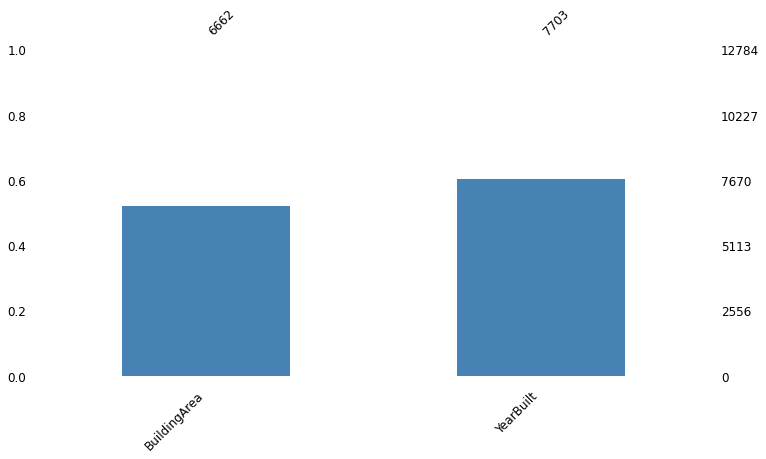

In [ ]:
msno.bar(encoded_types.loc[:,null_columns],figsize=(12, 6), fontsize=12, color='steelblue')

In [ ]:
#Imputamos

knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")

encoded_types_imputed_knn = pandas.DataFrame(knn_imputer.fit_transform(encoded_types.loc[:,:]),
                                     columns = encoded_types.loc[:,:].columns)

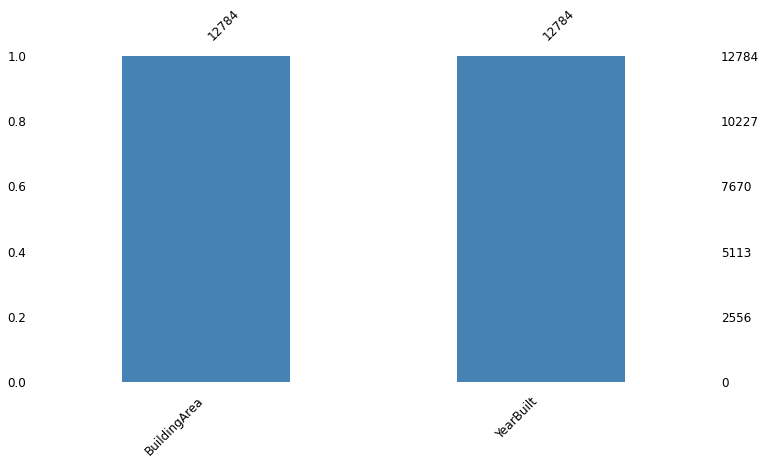

In [ ]:
#Ahora graficamos después de imputar:

msno.bar(encoded_types_imputed_knn.loc[:,null_columns],figsize=(12, 6), fontsize=12, color='steelblue')

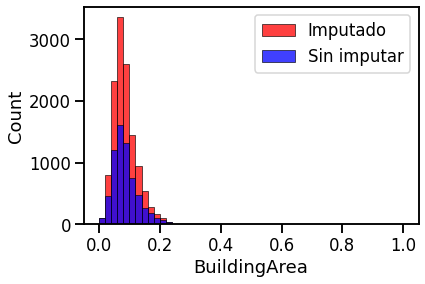

In [ ]:
#Graficamos la distribución de los datos sin imputar e imputados para la columna BuildingArea:
seaborn.histplot(encoded_types_imputed_knn,x='BuildingArea',bins=50, color='red', label = "Imputado")
seaborn.histplot(encoded_types,x='BuildingArea',bins=50,color='blue', label = "Sin imputar")
plt.legend()
plt.show()

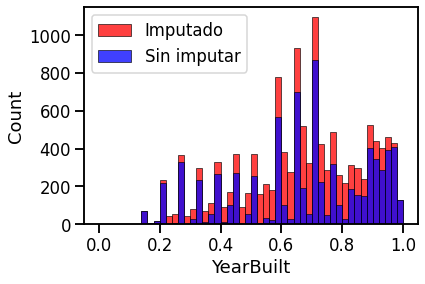

In [ ]:
#Graficamos la distribución de los datos sin imputar e imputados para la columna YearBuilt:
seaborn.histplot(encoded_types_imputed_knn,x='YearBuilt',bins=50, color='red', label = "Imputado")
seaborn.histplot(encoded_types,x='YearBuilt',bins=50,color='blue', label = "Sin imputar")
plt.legend()
plt.show()

En esta sección los valores nulos fueron imputados por un modelo KNN de n_neighbours = 5. Observamos que el modelo funcionó bien, distribuyendo los valores imputados a lo largo del rango de cada variable.

## Imputación múltiple por ecuaciones encadenadas (MICE) 

En esta sección utilizaremos el método MICE para imputar datos.

In [ ]:
encoded_types

,Rooms,Bedroom2,Bathroom,Distance,Car,Landsize,BuildingArea,YearBuilt,airbnb_price_mean,Type_h,...,CouncilArea_Moonee Valley,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,0.25,0.25,0.333333,0.090253,0.25,0.016423,NaN,NaN,0.337506,1,...,0,0,0,0,0,0,0,0,1,0
1,0.25,0.25,0.333333,0.090253,0.00,0.012683,0.050609,0.271605,0.337506,1,...,0,0,0,0,0,0,0,0,1,0
2,0.50,0.50,0.666667,0.090253,0.00,0.010894,0.096092,0.271605,0.337506,1,...,0,0,0,0,0,0,0,0,1,0
3,0.50,0.50,0.666667,0.090253,0.25,0.007642,NaN,NaN,0.337506,1,...,0,0,0,0,0,0,0,0,1,0
4,0.75,0.50,0.333333,0.090253,0.50,0.009756,0.090967,0.975309,0.337506,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779,0.50,0.50,0.666667,0.595668,0.50,0.020813,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0
12780,0.75,0.75,0.666667,0.602888,0.50,0.053008,NaN,0.771605,0.310226,1,...,0,0,0,0,0,0,0,0,0,0
12781,0.50,0.50,0.666667,0.245487,0.50,0.027073,0.085202,0.858025,0.587545,1,...,0,0,0,0,0,0,0,0,0,0
12782,0.50,0.50,0.666667,0.245487,1.00,0.035447,NaN,0.870370,0.587545,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

melb_df_2_sca_mice = encoded_types.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())  # DecisionTreeRegressor() || KNeighborsRegressor() # Lo cambie a DecisionTreeRegressor porque consume menos RAM

melb_df_2_sca_mice = pandas.DataFrame(mice_imputer.fit_transform(melb_df_2_sca_mice),columns = melb_df_2_sca_mice.columns)


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


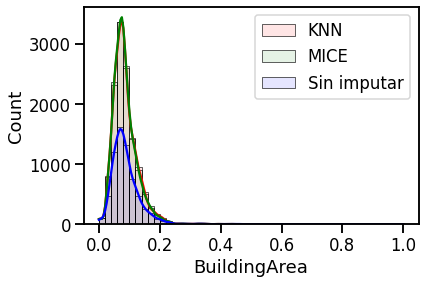

In [ ]:
#Comparamos la distribución de los datos sin imputar, imputados con KNN e imputados con MICE para la columna BuildingArea:
seaborn.histplot(encoded_types_imputed_knn,x='BuildingArea',bins=50, color='red', label = "KNN", alpha = 0.1, kde = True)
seaborn.histplot(melb_df_2_sca_mice,x='BuildingArea',bins=50, color='green', label = "MICE", alpha = 0.1, kde = True )
seaborn.histplot(encoded_types,x='BuildingArea',bins=50,color='blue', label = "Sin imputar", alpha = 0.1, kde = True)
plt.legend()


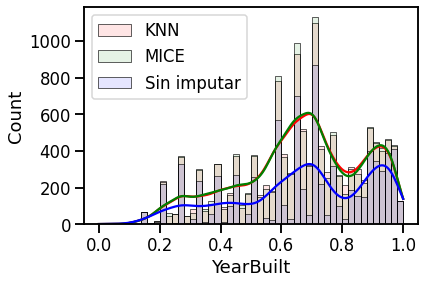

In [ ]:
#Comparamos la distribución de los datos sin imputar, imputados con KNN e imputados con MICE para la columna YearBuilt:
seaborn.histplot(encoded_types_imputed_knn,x='YearBuilt',bins=50, color='red', label = "KNN", alpha = 0.1, kde = True)
seaborn.histplot(melb_df_2_sca_mice,x='YearBuilt',bins=50, color='green', label = "MICE",  alpha = 0.1, kde = True )
seaborn.histplot(encoded_types,x='YearBuilt',bins=50,color='blue', label = "Sin imputar",  alpha = 0.1, kde = True)
plt.legend()

Notamos que el método MICE no mejora mucho la distribución de los datos imputados con respecto al método KNN, y por el otro lado, requiere un tiempo más de cómputo y más espacio de memoria RAM.



## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [ ]:
# Elegir el de mejor performance
pca_df = encoded_types_imputed_knn.copy()
#pca_df = melb_df_2_sca_mice.copy()

In [ ]:
pca_df

,Rooms,Bedroom2,Bathroom,Distance,Car,Landsize,BuildingArea,YearBuilt,airbnb_price_mean,Type_h,...,CouncilArea_Moonee Valley,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,0.25,0.25,0.333333,0.090253,0.25,0.016423,0.053940,0.462963,0.337506,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.25,0.25,0.333333,0.090253,0.00,0.012683,0.050609,0.271605,0.337506,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.50,0.50,0.666667,0.090253,0.00,0.010894,0.096092,0.271605,0.337506,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.50,0.50,0.666667,0.090253,0.25,0.007642,0.076746,0.471605,0.337506,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.75,0.50,0.333333,0.090253,0.50,0.009756,0.090967,0.975309,0.337506,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779,0.50,0.50,0.666667,0.595668,0.50,0.020813,0.105958,0.825926,0.294563,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12780,0.75,0.75,0.666667,0.602888,0.50,0.053008,0.123767,0.771605,0.310226,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12781,0.50,0.50,0.666667,0.245487,0.50,0.027073,0.085202,0.858025,0.587545,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12782,0.50,0.50,0.666667,0.245487,1.00,0.035447,0.064830,0.870370,0.587545,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Es necesario estandarizar los datos para que se mantenga la distribución de los mismos.

In [ ]:
from sklearn.decomposition import PCA

#definir m según indicaciones
m = 5

principal_components_labels = [f"PC" + str(i) for i in range(1,m+1)]

pca = PCA(n_components=m )
pca.fit(pca_df)
#print("Principal components")
#print(pca.components_)
print("Explained variance ratio")
explained_ratio = pca.explained_variance_ratio_
#print("Varianza de cada PC ", pca.explained_variance_ratio_)
print(f"Varianza total con {m} componentes ", pca.explained_variance_ratio_.sum())

Explained variance ratio
Varianza total con 5 componentes  0.5021529454313858


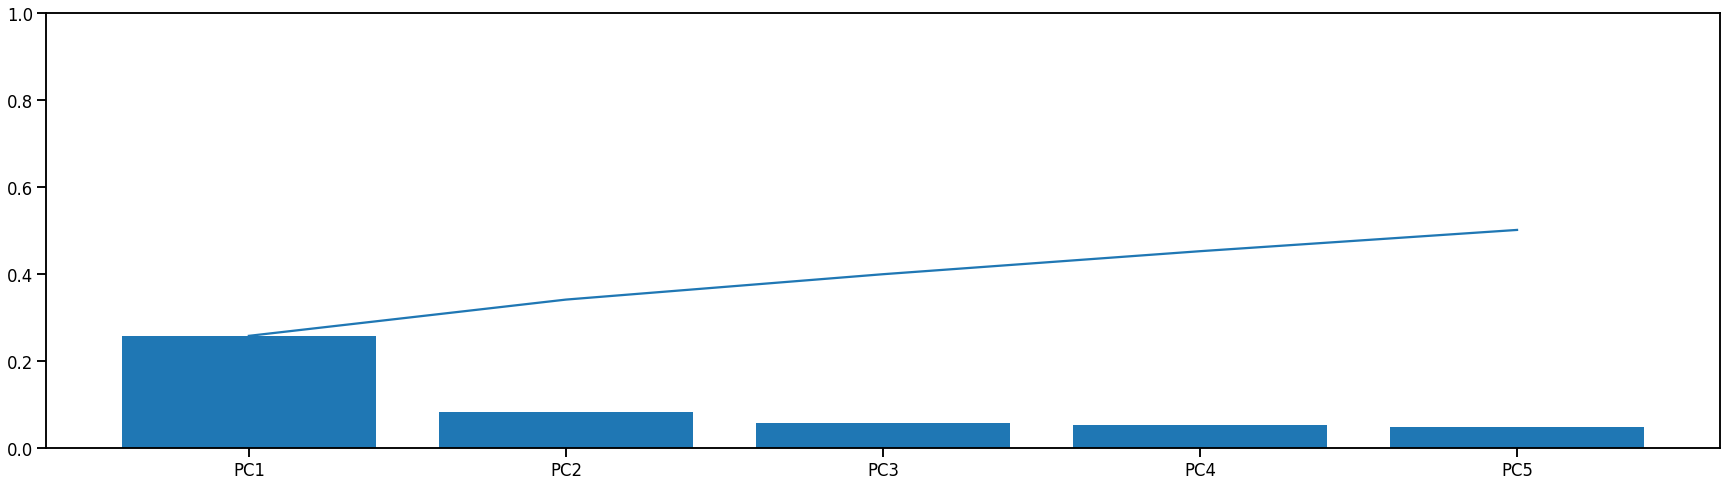

In [ ]:
fig,ax = plt.subplots(figsize = [30,8])
ax.bar(x = principal_components_labels, height = explained_ratio)
ax.plot(principal_components_labels, explained_ratio.cumsum())
ax.set_ylim([0,1])
# Rotar labels de eje X
plt.show()

Las 5 componentes utilizadas aportan el 50% de la varianza total. Si bien es una gran reducción de dimensionalidad, no creemos que sea una buena representación de la varianza total, y por otro lado, para llegar a un 80% de la misma necesitariamos 15 componentes, que tampoco nos parece una buena alternativa.

In [ ]:
encoded_types_reduced = pca.transform(pca_df)
encoded_types_reduced = pandas.DataFrame(encoded_types_reduced, columns = principal_components_labels)

#seaborn.pairplot(encoded_types_reduced)
encoded_types_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-0.215194,-0.485171,0.267633,0.442541,0.046022,0.268595,0.282561,0.139098,-0.157785,-0.372332,-0.224373,0.545716,0.159115,-0.047662,-0.239391,0.033121,-0.175475,-0.025817,-0.014732,0.008492
1,-0.208546,-0.589026,0.322809,0.519371,0.060365,0.332766,0.323321,0.148912,-0.206096,-0.389395,-0.209814,0.543876,0.090064,-0.043074,-0.195909,-0.051856,0.036215,-0.051542,-0.017543,0.002763
2,-0.359366,-0.378019,0.137552,0.397480,0.071866,0.271328,0.236407,0.294979,-0.278847,-0.481135,-0.107625,0.658787,-0.071051,-0.045392,-0.166767,-0.085669,0.126310,-0.021348,-0.057664,-0.039688
3,-0.364159,-0.272409,0.082779,0.319974,0.056550,0.206327,0.195342,0.284509,-0.228606,-0.464060,-0.123422,0.660373,-0.000297,-0.050847,-0.210496,-0.000130,-0.087171,0.003544,-0.058841,-0.035690
4,-0.363092,-0.108899,0.026869,0.181756,0.007495,0.093411,0.131400,0.231110,-0.099535,-0.443101,-0.183608,0.650696,0.125629,-0.085745,-0.269790,0.087224,-0.262806,0.016327,-0.066170,-0.011531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779,-0.420764,0.066673,-0.098009,-0.085130,-0.065435,-0.102151,0.029757,0.029829,0.086868,0.006377,-0.076599,-0.036036,0.125619,-0.073388,-0.012734,0.011192,-0.117533,-0.101599,-0.163184,-0.044572
12780,-0.544865,0.167720,-0.207506,-0.164291,-0.055808,-0.146269,-0.026473,0.108777,0.041613,-0.045169,-0.010620,0.028612,0.020459,-0.069531,-0.001303,-0.026526,0.019779,-0.069013,-0.068411,-0.006789
12781,-0.369749,-0.001568,-0.120469,0.072380,0.002034,-0.080591,-0.027660,0.146351,-0.027507,-0.012766,0.007970,-0.019850,0.087962,0.024682,0.042567,0.070011,-0.183682,-0.015072,-0.171936,-0.078435
12782,-0.424229,0.094293,-0.204221,-0.024503,0.008187,-0.161246,-0.082591,0.136385,0.001286,0.030713,0.019701,-0.018107,0.167997,0.046652,-0.038579,0.217327,-0.531918,0.067946,0.017925,0.008858


In [ ]:
pca_df_completed = pca_df.join(encoded_types_reduced)
pca_df_completed

,Rooms,Bedroom2,Bathroom,Distance,Car,Landsize,BuildingArea,YearBuilt,airbnb_price_mean,Type_h,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,0.25,0.25,0.333333,0.090253,0.25,0.016423,0.053940,0.462963,0.337506,1.0,...,-0.224373,0.545716,0.159115,-0.047662,-0.239391,0.033121,-0.175475,-0.025817,-0.014732,0.008492
1,0.25,0.25,0.333333,0.090253,0.00,0.012683,0.050609,0.271605,0.337506,1.0,...,-0.209814,0.543876,0.090064,-0.043074,-0.195909,-0.051856,0.036215,-0.051542,-0.017543,0.002763
2,0.50,0.50,0.666667,0.090253,0.00,0.010894,0.096092,0.271605,0.337506,1.0,...,-0.107625,0.658787,-0.071051,-0.045392,-0.166767,-0.085669,0.126310,-0.021348,-0.057664,-0.039688
3,0.50,0.50,0.666667,0.090253,0.25,0.007642,0.076746,0.471605,0.337506,1.0,...,-0.123422,0.660373,-0.000297,-0.050847,-0.210496,-0.000130,-0.087171,0.003544,-0.058841,-0.035690
4,0.75,0.50,0.333333,0.090253,0.50,0.009756,0.090967,0.975309,0.337506,1.0,...,-0.183608,0.650696,0.125629,-0.085745,-0.269790,0.087224,-0.262806,0.016327,-0.066170,-0.011531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779,0.50,0.50,0.666667,0.595668,0.50,0.020813,0.105958,0.825926,0.294563,1.0,...,-0.076599,-0.036036,0.125619,-0.073388,-0.012734,0.011192,-0.117533,-0.101599,-0.163184,-0.044572
12780,0.75,0.75,0.666667,0.602888,0.50,0.053008,0.123767,0.771605,0.310226,1.0,...,-0.010620,0.028612,0.020459,-0.069531,-0.001303,-0.026526,0.019779,-0.069013,-0.068411,-0.006789
12781,0.50,0.50,0.666667,0.245487,0.50,0.027073,0.085202,0.858025,0.587545,1.0,...,0.007970,-0.019850,0.087962,0.024682,0.042567,0.070011,-0.183682,-0.015072,-0.171936,-0.078435
12782,0.50,0.50,0.666667,0.245487,1.00,0.035447,0.064830,0.870370,0.587545,1.0,...,0.019701,-0.018107,0.167997,0.046652,-0.038579,0.217327,-0.531918,0.067946,0.017925,0.008858


## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.



Agregamos columna price

In [ ]:
pca_df_completed = pca_df_completed.join(price_column)
pca_df_completed

,Rooms,Bedroom2,Bathroom,Distance,Car,Landsize,BuildingArea,YearBuilt,airbnb_price_mean,Type_h,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Price
0,0.25,0.25,0.333333,0.090253,0.25,0.016423,0.053940,0.462963,0.337506,1.0,...,0.545716,0.159115,-0.047662,-0.239391,0.033121,-0.175475,-0.025817,-0.014732,0.008492,1480000
1,0.25,0.25,0.333333,0.090253,0.00,0.012683,0.050609,0.271605,0.337506,1.0,...,0.543876,0.090064,-0.043074,-0.195909,-0.051856,0.036215,-0.051542,-0.017543,0.002763,1035000
2,0.50,0.50,0.666667,0.090253,0.00,0.010894,0.096092,0.271605,0.337506,1.0,...,0.658787,-0.071051,-0.045392,-0.166767,-0.085669,0.126310,-0.021348,-0.057664,-0.039688,1465000
3,0.50,0.50,0.666667,0.090253,0.25,0.007642,0.076746,0.471605,0.337506,1.0,...,0.660373,-0.000297,-0.050847,-0.210496,-0.000130,-0.087171,0.003544,-0.058841,-0.035690,850000
4,0.75,0.50,0.333333,0.090253,0.50,0.009756,0.090967,0.975309,0.337506,1.0,...,0.650696,0.125629,-0.085745,-0.269790,0.087224,-0.262806,0.016327,-0.066170,-0.011531,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779,0.50,0.50,0.666667,0.595668,0.50,0.020813,0.105958,0.825926,0.294563,1.0,...,-0.036036,0.125619,-0.073388,-0.012734,0.011192,-0.117533,-0.101599,-0.163184,-0.044572,582000
12780,0.75,0.75,0.666667,0.602888,0.50,0.053008,0.123767,0.771605,0.310226,1.0,...,0.028612,0.020459,-0.069531,-0.001303,-0.026526,0.019779,-0.069013,-0.068411,-0.006789,1245000
12781,0.50,0.50,0.666667,0.245487,0.50,0.027073,0.085202,0.858025,0.587545,1.0,...,-0.019850,0.087962,0.024682,0.042567,0.070011,-0.183682,-0.015072,-0.171936,-0.078435,1031000
12782,0.50,0.50,0.666667,0.245487,1.00,0.035447,0.064830,0.870370,0.587545,1.0,...,-0.018107,0.167997,0.046652,-0.038579,0.217327,-0.531918,0.067946,0.017925,0.008858,1170000


In [ ]:
pca_df_completed.to_csv("/content/melb_data_final.csv", index=False)

In [ ]:
pca_df_completed

,Rooms,Bedroom2,Bathroom,Distance,Car,Landsize,BuildingArea,YearBuilt,airbnb_price_mean,Type_h,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Price
0,0.25,0.25,0.333333,0.090253,0.25,0.016423,0.053940,0.462963,0.337506,1.0,...,0.545716,0.159115,-0.047662,-0.239391,0.033121,-0.175475,-0.025817,-0.014732,0.008492,1480000
1,0.25,0.25,0.333333,0.090253,0.00,0.012683,0.050609,0.271605,0.337506,1.0,...,0.543876,0.090064,-0.043074,-0.195909,-0.051856,0.036215,-0.051542,-0.017543,0.002763,1035000
2,0.50,0.50,0.666667,0.090253,0.00,0.010894,0.096092,0.271605,0.337506,1.0,...,0.658787,-0.071051,-0.045392,-0.166767,-0.085669,0.126310,-0.021348,-0.057664,-0.039688,1465000
3,0.50,0.50,0.666667,0.090253,0.25,0.007642,0.076746,0.471605,0.337506,1.0,...,0.660373,-0.000297,-0.050847,-0.210496,-0.000130,-0.087171,0.003544,-0.058841,-0.035690,850000
4,0.75,0.50,0.333333,0.090253,0.50,0.009756,0.090967,0.975309,0.337506,1.0,...,0.650696,0.125629,-0.085745,-0.269790,0.087224,-0.262806,0.016327,-0.066170,-0.011531,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779,0.50,0.50,0.666667,0.595668,0.50,0.020813,0.105958,0.825926,0.294563,1.0,...,-0.036036,0.125619,-0.073388,-0.012734,0.011192,-0.117533,-0.101599,-0.163184,-0.044572,582000
12780,0.75,0.75,0.666667,0.602888,0.50,0.053008,0.123767,0.771605,0.310226,1.0,...,0.028612,0.020459,-0.069531,-0.001303,-0.026526,0.019779,-0.069013,-0.068411,-0.006789,1245000
12781,0.50,0.50,0.666667,0.245487,0.50,0.027073,0.085202,0.858025,0.587545,1.0,...,-0.019850,0.087962,0.024682,0.042567,0.070011,-0.183682,-0.015072,-0.171936,-0.078435,1031000
12782,0.50,0.50,0.666667,0.245487,1.00,0.035447,0.064830,0.870370,0.587545,1.0,...,-0.018107,0.167997,0.046652,-0.038579,0.217327,-0.531918,0.067946,0.017925,0.008858,1170000


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. 

Adjuntamos a este informe un pdf con la misma informacion que dejamos aquí abajo:



```
## Introducción
Se comienza con dos dataset:
 
- Melbourne data frame 
Obtenido de:
'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
Consta de 13580 entradas y de las siguientes columnas:
'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'.
 
- Airbnb data frame
Obtenido de:
'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv'
Consta de 22895 entradas y de las siguientes columnas:
'id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighborhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'reviews_per_month'.
 
 
## Criterios de exclusión de ejemplos en el data frame de Melbourne
 
Para excluir ejemplos dentro de las características numéricas utilizamos el método de los 3 sigmas: filtramos los valores por encima o por debajo de 3 desvíos estándar de la media de cada columna numérica. Vemos así que el valor de desviación estándar relativa (el desvío dividido la media) disminuye luego de aplicado este método. De esta manera eliminamos un 7.2% de los registros.
Para el caso de las características categóricas ponderamos cada categoría calculando las frecuencias relativas y a las categorías que tenían menor frecuencia relativa que un 0.5% eliminamos los registros De esta manera eliminamos un 5.6% de los registros.
 
## Características seleccionadas
 
### Características numéricas
Las características numéricas seleccionadas de Melbourne data frame:
- Rooms: Cantidad de habitaciones
- Bedroom2: Cantidad de dormitorios
- Bathrooms: Cantidad de baños
- Distance: Distancia al centro de la ciudad
- Landsize: Superficie del terreno
- BuildingSize: Superficie construida
- Car: Cantidad de cocheras
- YearBuilt: Año de construcción
- Postcode: Código Postal
 
El Precio para evaluar una eventual predicción.
 
Algunas características numéricas fueron agregadas de Airbnb df. Estas fueron vinculadas al data frame de Melbourne a través del Zipcode/Postcode. Se unificó el formato de los zipcodes llevando toda la columna a numérica, para solucionar los datos repetidos. Se tomaron aquellos Zipcodes de Airbnb con más de 25 entradas. Sólo un 12% de Postcodes no fueron vinculados. Para vincular a un Zipcode varios registros, las características fueron resumidas en su valor promedio. Luego, la característica numérica agregada de Airbnb data frame es:
- Price_mean: Precio promedio de alquiler por día 
- Zipcode: Código postal. 
 
Las columnas de Zipcode y Postcode fueron eliminadas luego del merge de data frames.
 
### Características categóricas
Las características categóricas seleccionadas de Melbourne data frame:
- Type: tipo de propiedad. 3 valores posibles
- CouncilArea: Municipio. 33 valores posibles
 
### Transformaciones
- Todas las características categóricas fueron codificadas con el
 método getdummies de la librería de Pandas. Este método es equivalente al método OneHotEncoder.
- Todas las características numéricas, menos el precio (la cual es la variable objetivo), fueron estandarizadas utilizando el método MinMaxScaler, de la librería sklearn.preprocessing. Este método escalea los datos al intervalo [0,1].
- Todas las características numéricas con valores nulos (*) fueron imputadas utilizando el algoritmo KNN de la librería sklearn.impute, con n_neighbours = 5.
*Cantidad de valores nulos por columna:
Car                            59
BuildingArea                  5830
YearBuilt                     4818
CouncilArea                   1074
airbnb_price_mean             1464
 
### Datos aumentados
- Se agregaron las 5 primeras columnas obtenidas a través del método de PCA, aplicado sobre el conjunto de datos totalmente procesado, menos la columna Price. Estas 5 columnas representan un 50% de la varianza total.
- Se agregó al final del procesamiento la columna Price para una eventual predicción en otro trabajo.
 
## Dataset final
El dataset final queda con 247 columnas numéricas 60 y 12784 filas.


```
